<a href="https://colab.research.google.com/github/JoshuaPMallory/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/D1_regression_classification_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. Choose a feature, and plot its relationship with the target.
- [X] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [X] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [0]:
import matplotlib.pyplot as plt
import numpy as np

df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


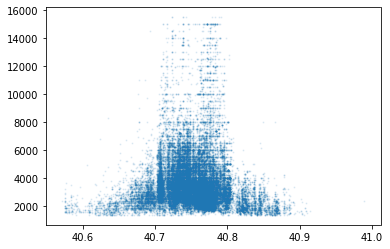

In [0]:
target   = 'price'
features = ['latitude']

plt.scatter(df[features]
           ,df[target]
           ,s = 1
           ,alpha = 0.1
           )


plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics      import mean_absolute_error
import plotly.express as px


def predictor(guess, ans):
    if type(guess) != float:
        print('Guess needs to be a float.')
    else:
        if type(ans) != list:
            ans  = [ans]
        model    = LinearRegression()
        features = ['latitude']
        target   = 'price'
        x_train  = df[features]
        y_train  = df[target]

        model.fit(x_train, y_train)

        x_test   = [[guess]]
        y_pred   = model.predict(x_test)
        mae      = mean_absolute_error(ans, y_pred)
        return y_pred, mae

predictor(40.8, 3498.89302617)



(array([3498.89302617]), 3.3423930290155113e-10)

# Storing this for when I want to run multiple linear regressions on one data set

In [0]:
def mean_abs_error():
    # Calculate mean absolute error on the training data
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)

    # Calculate mean absolute error on the test data
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)

    # Display the errors
    return round(train_error, 2), round(test_error, 2)
    
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(train[features], train[target])
mean_abs_error()

(1270.1, 1338.13)

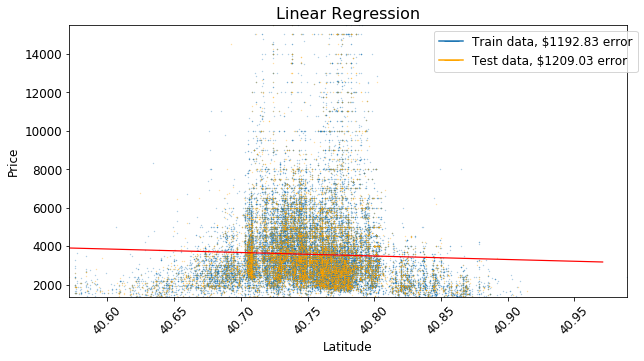

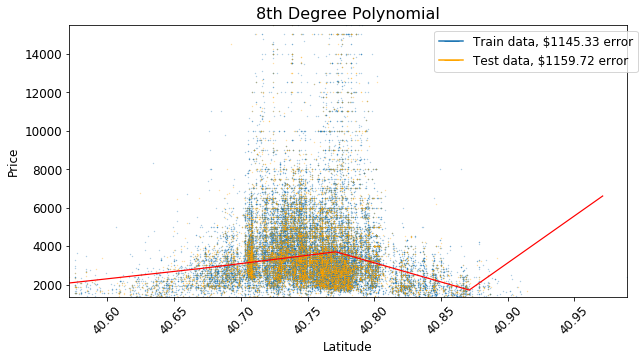

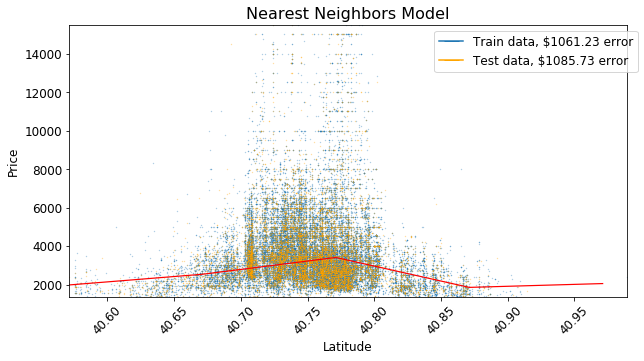

In [0]:
from   sklearn.metrics         import mean_absolute_error
from   sklearn.linear_model    import LinearRegression
from   sklearn.pipeline        import make_pipeline
from   sklearn.preprocessing   import PolynomialFeatures
from   sklearn.neighbors       import KNeighborsRegressor
from   sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.lines  as mlines
import numpy             as np

models       = [('Linear Regression'       ,LinearRegression()), 
                ('8th Degree Polynomial'   ,make_pipeline(PolynomialFeatures(degree = 8), LinearRegression())),
                ('Nearest Neighbors Model' ,KNeighborsRegressor(n_neighbors = 100))]

target       = 'price'
features     = ['latitude']
train, test  = train_test_split(df.copy(), random_state = 0)



x_axis_range = [[c] for c in np.arange(df[features[0]].min(), df[features[0]].max(), 0.1)]

for name, model in models:
    ax = train.plot.scatter(x     = features[0]
                           ,y     = target
                           ,alpha = 0.5
                           ,s     = 0.1
                           ,figsize = (10, 5)
                           )
    test.plot.scatter(x     = features[0]
                     ,y     = target
                     ,s     = 0.1
                     ,color = 'orange'
                     ,alpha = 0.5
                     ,ax    = ax
                     )
    
    model.fit(train[features]
             ,train[[target]]
             )
    
    plt.plot(x_axis_range
            ,model.predict(x_axis_range)
            ,color     = 'red'
            ,linewidth = 1.2
            )
    
    blue_data   = mlines.Line2D([]
                               ,[]
                               ,marker     = '_'
                               ,markersize = 15
                               ,label      = "Train data, $" + str(mean_abs_error()[0]) + " error"
                               )
    orange_data = mlines.Line2D([]
                               ,[]
                               ,color      = 'orange'
                               ,marker     = '_'
                               ,markersize = 15
                               ,label      = "Test data, $"  + str(mean_abs_error()[1]) + " error"
                               )

    plt.title(name
             ,fontsize = 16
             )
    ax.legend(handles = [blue_data
                         ,orange_data]
             ,bbox_to_anchor = (1.03, 1)
             ,fontsize = 12
             )

    # X-axis
    plt.xlabel('Latitude'
              ,fontsize = 12
              )
    plt.xticks(rotation = 45
              ,fontsize = 12
              )
    plt.xlim((df['latitude'].min()
             ,df['latitude'].max()
             )
            )

    # Y-axis
    plt.ylabel('Price'
              ,fontsize = 12
              )
    plt.yticks(fontsize = 12)
    plt.ylim((df[target].min(), df[target].max()))
    
    
    plt.show()

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?